In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import json
import pandas as pd
import seaborn as sns

In [2]:
# set the directory path
dir_path = './'
print('dir_path' , dir_path)
df_small = pd.DataFrame(columns={
    'gl':[],
    'gh':[],
    'average_read_latency_per_page (ns)': [],
    'average_write_latency_per_page (ns)': [],
    '99.99%_read_latency_per_page (ns)': [],
    '99.99%_write_latency_per_page (ns)': [],
    '99.9999%_read_latency_per_page (ns)': [],
    '99.9999%_write_latency_per_page (ns)': [],
    'total_gc_time (ns)':[],
    'workload_completion_time (ns)':[],
    'erase.data.block':[],
    'user.page.moves':[]
})
df_medium = pd.DataFrame(columns={
    'gl':[],
    'gh':[],
    'average_read_latency_per_page (ns)': [],
    'average_write_latency_per_page (ns)': [],
    '99.99%_read_latency_per_page (ns)': [],
    '99.99%_write_latency_per_page (ns)': [],
    '99.9999%_read_latency_per_page (ns)': [],
    '99.9999%_write_latency_per_page (ns)': [],
    'total_gc_time (ns)':[],
    'workload_completion_time (ns)':[],
    'erase.data.block':[],
    'user.page.moves':[]
})


dir_path ./


In [3]:
# loop through all the files and folders in the directory
for root, dirs, files in os.walk(dir_path):
    # record the folder name
#     print('Folder:', root)
    pattern = r"(\w+)-(\d+\.\d+)-(\d+\.\d+)"
    match = re.search(pattern, root)
    if match:
        name = match.group(1) # 'small'
        num1 = float(match.group(2)) # 0.8
        num2 = float(match.group(3)) # 0.3
#         print(name, num1, num2)
        
    # print the names of all the files in the folder
        for filename in files:
#             print('File:', filename)
            filepath = os.path.join(str(root), 'recorder.json')
        with open(filepath, 'r') as f:
            data = json.load(f)
#             print('json data',data.keys())
        avg_read_latency_per_page = data['average_read_latency_per_page (ns)']
        avg_write_latency_per_page = data['average_write_latency_per_page (ns)']
        p9999_read_latency_per_page = data['99.99%_read_latency_per_page (ns)']
        p9999_write_latency_per_page = data['99.99%_write_latency_per_page (ns)']
        p999999_read_latency_per_page = data['99.9999%_read_latency_per_page (ns)']
        p999999_write_latency_per_page = data['99.9999%_write_latency_per_page (ns)']
        total_gc_time = data['total_gc_time (ns)']
        workload_completion_time = data['workload_completion_time (ns)']

        gc_data = data['general_accumulator']['gc']
        erase_data_block = gc_data['erase.data.block']
        if 'user.page.moves' in gc_data:
            user_page_moves = gc_data['user.page.moves']
        else:
            user_page_moves = None
            
        # create a new row to add
        new_row = {'gl':num2,'gh':num1,'average_read_latency_per_page (ns)': avg_read_latency_per_page,
                   'average_write_latency_per_page (ns)': avg_write_latency_per_page, 
                  '99.99%_read_latency_per_page (ns)': p9999_read_latency_per_page,
                   '99.99%_write_latency_per_page (ns)': p9999_write_latency_per_page,
                   '99.9999%_read_latency_per_page (ns)': p999999_read_latency_per_page,
                   '99.9999%_write_latency_per_page (ns)': p999999_write_latency_per_page,
                   'total_gc_time (ns)':total_gc_time,
                   'workload_completion_time (ns)':workload_completion_time,
                   'erase.data.block':erase_data_block,
                   'user.page.moves':user_page_moves
                  }
        
        if name == 'small':
            df_small = df_small.append(new_row, ignore_index=True)
        elif name == 'medium':
            df_medium = df_medium.append(new_row, ignore_index=True)

#         print(avg_read_latency_per_page)
#         print(avg_write_latency_per_page)
#         print(p9999_read_latency_per_page)
#         print(p9999_write_latency_per_page)
#         print(p999999_read_latency_per_page)
#         print(p999999_write_latency_per_page)
#         print(total_gc_time)
#         print(workload_completion_time)
#         print(erase_data_block)
#         print(user_page_moves)
            

C:\Users\liufe\AppData\Local\Temp\ipykernel_35208\88016497.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_medium = df_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_35208\88016497.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_medium = df_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_35208\88016497.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_medium = df_medium.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_35208\88016497.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_medium = df_medium.app

In [14]:
# df_small

In [15]:
# df_medium

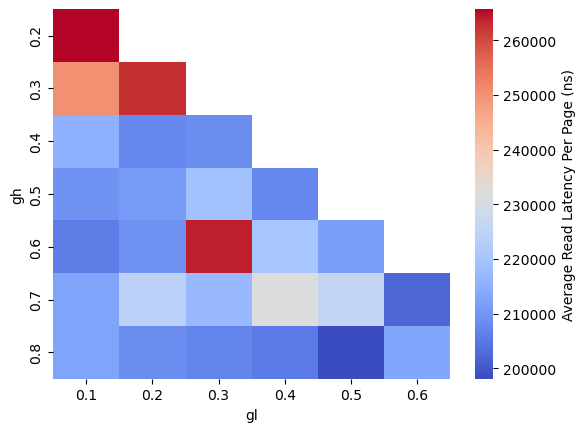

In [6]:
heatmap_data = df_small.pivot('gh', 'gl', 'average_read_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Read Latency Per Page (ns)'})
plt.show()

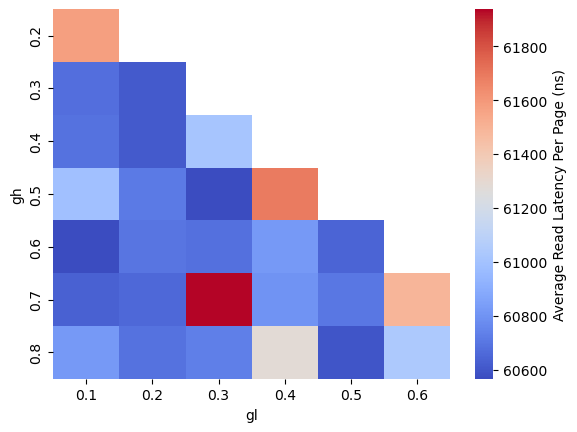

In [7]:
heatmap_data = df_medium.pivot('gh', 'gl', 'average_read_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Read Latency Per Page (ns)'})
plt.show()

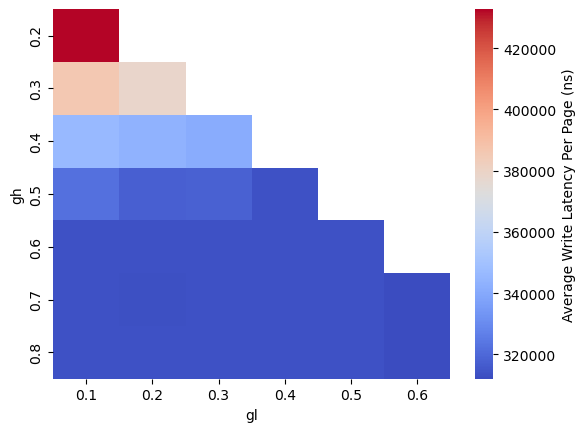

In [10]:
heatmap_data = df_small.pivot('gh', 'gl', 'average_write_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Write Latency Per Page (ns)'})
plt.show()

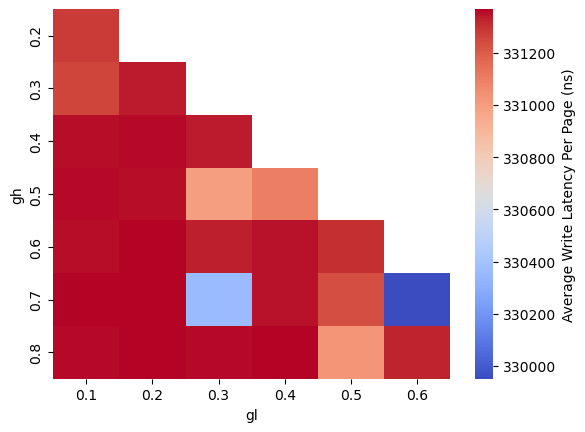

In [13]:
heatmap_data = df_medium.pivot('gh', 'gl', 'average_write_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Write Latency Per Page (ns)'})
plt.show()

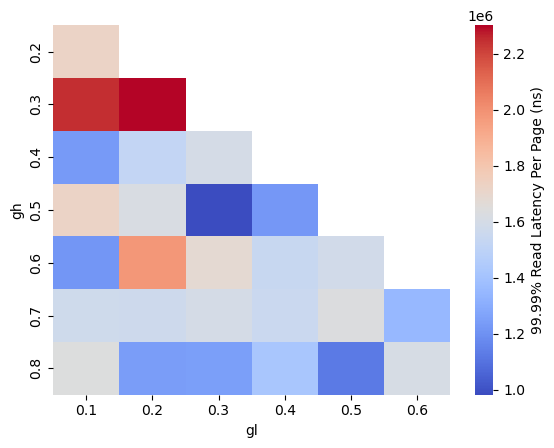

In [16]:
heatmap_data = df_small.pivot('gh', 'gl', '99.99%_read_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': '99.99% Read Latency Per Page (ns)'})
plt.show()

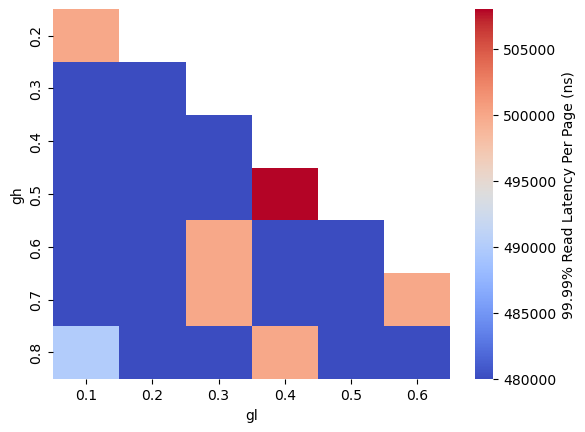

In [17]:
heatmap_data = df_medium.pivot('gh', 'gl', '99.99%_read_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': '99.99% Read Latency Per Page (ns)'})
plt.show()

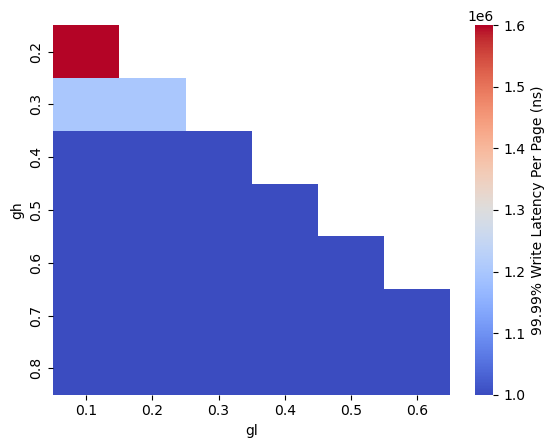

In [18]:
heatmap_data = df_small.pivot('gh', 'gl', '99.99%_write_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': '99.99% Write Latency Per Page (ns)'})
plt.show()

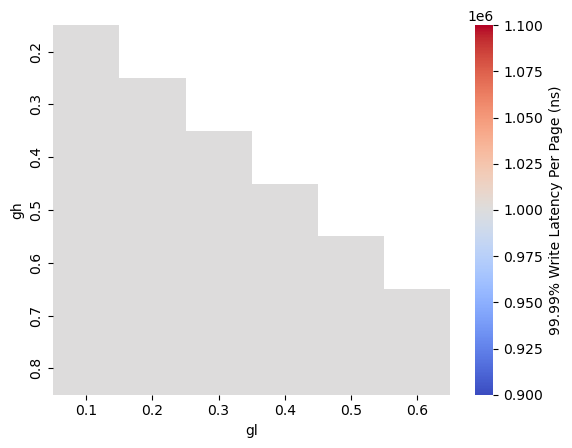

In [19]:
heatmap_data = df_medium.pivot('gh', 'gl', '99.99%_write_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': '99.99% Write Latency Per Page (ns)'})
plt.show()

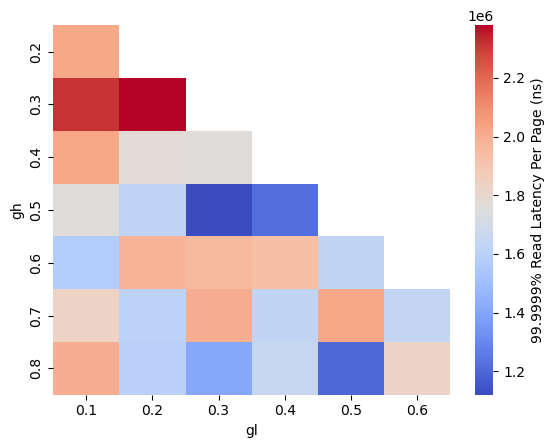

In [20]:
heatmap_data = df_small.pivot('gh', 'gl', '99.9999%_read_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': '99.9999% Read Latency Per Page (ns)'})
plt.show()

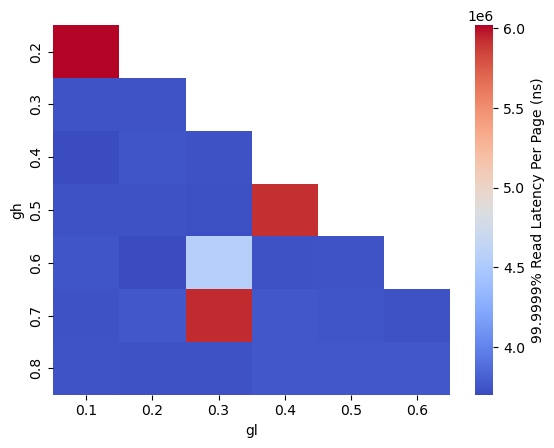

In [21]:
heatmap_data = df_medium.pivot('gh', 'gl', '99.9999%_read_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': '99.9999% Read Latency Per Page (ns)'})
plt.show()

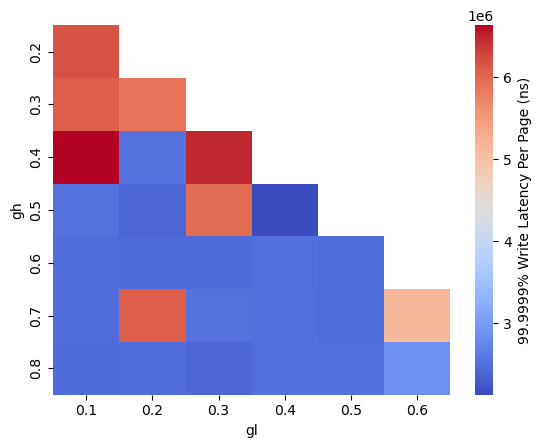

In [22]:
heatmap_data = df_small.pivot('gh', 'gl', '99.9999%_write_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': '99.9999% Write Latency Per Page (ns)'})
plt.show()

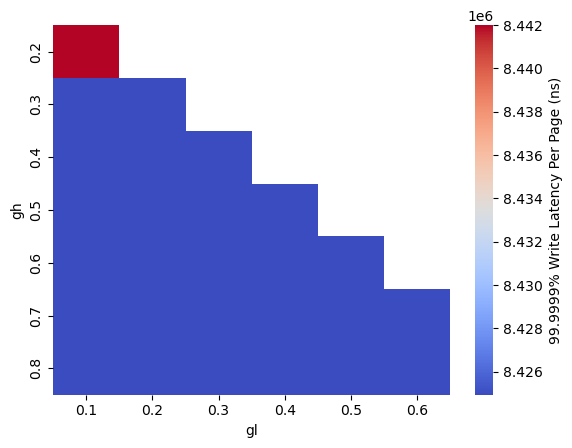

In [23]:
heatmap_data = df_medium.pivot('gh', 'gl', '99.9999%_write_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': '99.9999% Write Latency Per Page (ns)'})
plt.show()

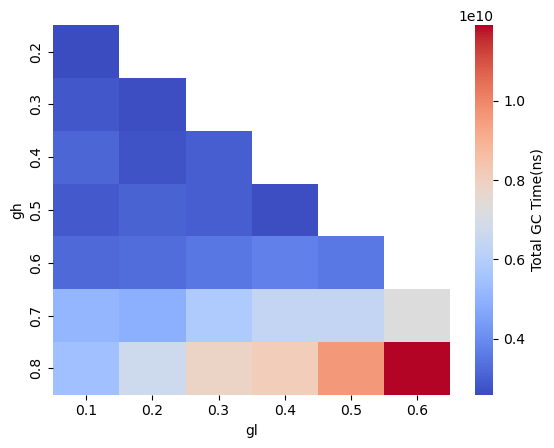

In [24]:
heatmap_data = df_small.pivot('gh', 'gl', 'total_gc_time (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Total GC Time(ns)'})
plt.show()

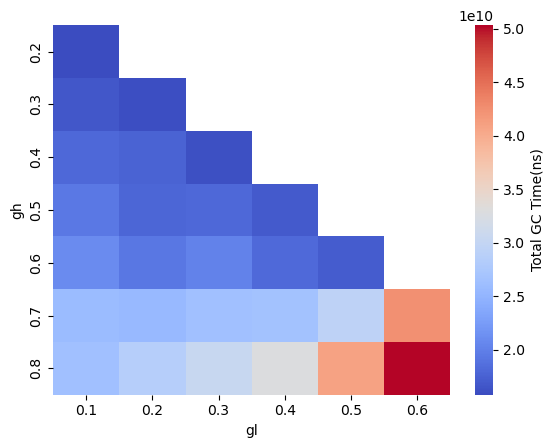

In [25]:
heatmap_data = df_medium.pivot('gh', 'gl', 'total_gc_time (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Total GC Time(ns)'})
plt.show()

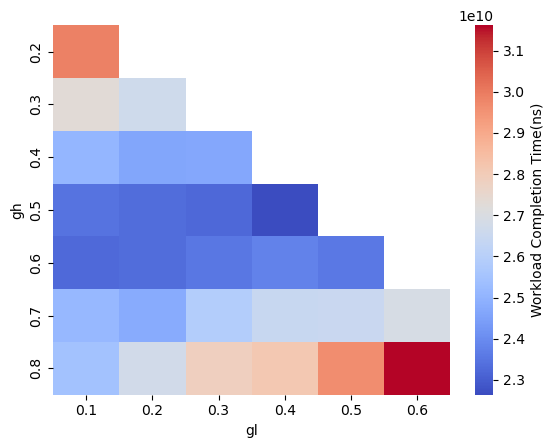

In [26]:
heatmap_data = df_small.pivot('gh', 'gl', 'workload_completion_time (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Workload Completion Time(ns)'})
plt.show()

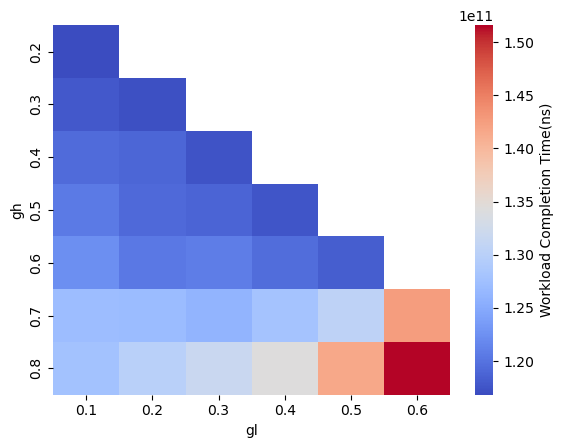

In [27]:
heatmap_data = df_medium.pivot('gh', 'gl', 'workload_completion_time (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Workload Completion Time(ns)'})
plt.show()

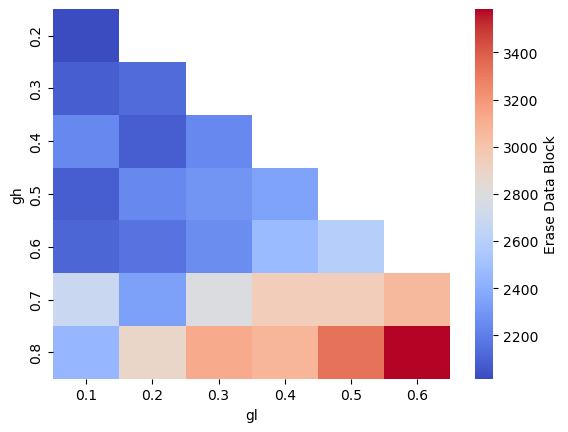

In [28]:
heatmap_data = df_small.pivot('gh', 'gl', 'erase.data.block')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Erase Data Block'})
plt.show()

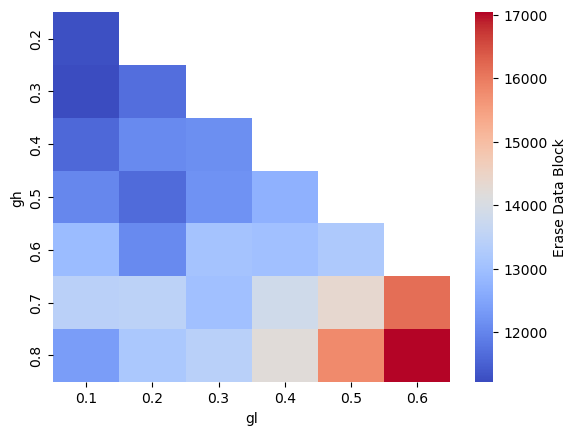

In [29]:
heatmap_data = df_medium.pivot('gh', 'gl', 'erase.data.block')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Erase Data Block'})
plt.show()

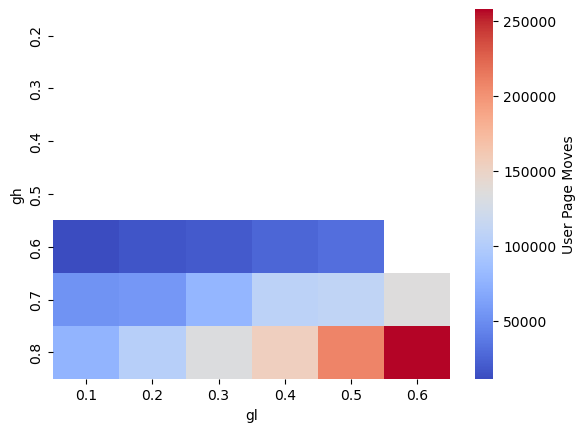

In [30]:
heatmap_data = df_small.pivot('gh', 'gl', 'user.page.moves')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'User Page Moves'})
plt.show()

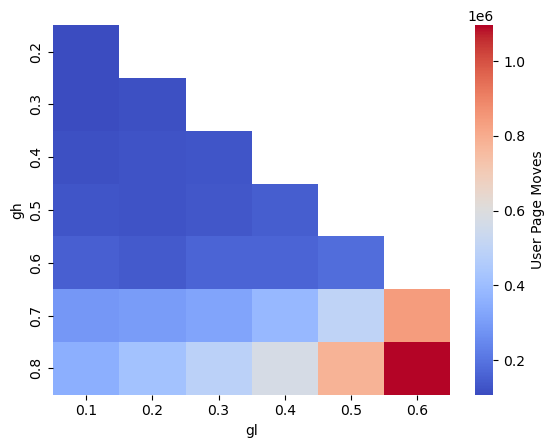

In [31]:
heatmap_data = df_medium.pivot('gh', 'gl', 'user.page.moves')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'User Page Moves'})
plt.show()